# REDES NEURONALES

---



En esta actividad vamos a utilizar una red neuronal para clasificar imágenes de prendas de ropa. Para ello, utilizaremos Keras con TensorFlow.

El dataset a utilizar es Fashion MNIST, un problema sencillo con imágenes pequeñas de ropa, pero más interesante que el dataset de MNIST. Puedes consultar más información sobre el dataset en [este enlace](https://github.com/zalandoresearch/fashion-mnist).

El código utilizado para contestar tiene que quedar claramente reflejado en el Notebook. Puedes crear nuevas celdas si así lo deseas para estructurar tu código y sus salidas. A la hora de entregar el notebook, **asegúrate de que los resultados de ejecutar tu código han quedado guardados**. Por ejemplo, a la hora de entrenar una red neuronal tiene que verse claramente un log de los resultados de cada epoch.

In [110]:
import sys

import tensorflow as tf
from tensorflow import keras
from keras.src.datasets import fashion_mnist
from keras.src.models import Sequential
from keras.src.layers import Dense, Flatten, BatchNormalizationV2, Dropout
from keras.initializers import Zeros, RandomNormal, GlorotUniform
from keras.regularizers import L1L2
from keras.src.optimizers import SGD, Adagrad

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [39]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [40]:
print(f"Executing Python {sys.version}")
print(f"TensorFlow version: {tf.__version__}")
#print(f"Keras version: {keras.__version__}")
print(f"CPU support: {'Yes' if tf.reduce_sum(tf.random.normal([1000, 1000])) is not None else 'No'}")
print(f"Num GPUs Available: {len(tf.config.list_physical_devices('GPU'))}")

Executing Python 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
TensorFlow version: 2.15.1
CPU support: Yes
Num GPUs Available: 1


In [41]:
!nvidia-smi

/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
Sat May 11 11:15:25 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.76.01              Driver Version: 552.44         CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce GTX 1070        On  |   00000000:01:00.0  On |                  N/A |
|  0%   50C    P8             17W /  210W |    7849MiB /   8192MiB |      6%      Default |
|                                         |                       

En primer lugar vamos a importar el dataset Fashion MNIST (recordad que este es uno de los dataset de entranamiento que estan guardados en keras) que es el que vamos a utilizar en esta actividad:

In [2]:
mnist = tf.keras.datasets.fashion_mnist

Llamar a **load_data** en este dataset nos dará dos conjuntos de dos listas, estos serán los valores de entrenamiento y prueba para los gráficos que contienen las prendas de vestir y sus etiquetas.

Nota: Aunque en esta actividad lo veis de esta forma, también lo vais a poder encontrar como 4 variables de esta forma: training_images, training_labels, test_images, test_labels = mnist.load_data()

In [3]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

Antes de continuar vamos a dar un vistazo a nuestro dataset, para ello vamos a ver una imagen de entrenamiento y su etiqueta o clase.

Label: 9
Image: <<<<<<<<<<<<<<<<<<<<
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1  

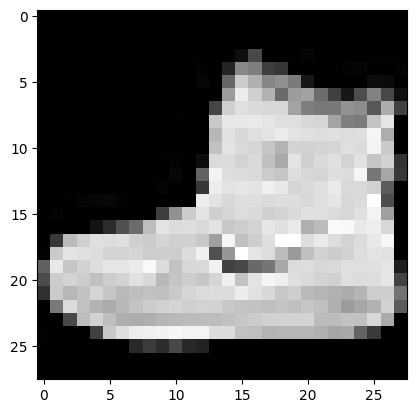

In [44]:
np.set_printoptions(linewidth=200)
plt.imshow(training_images[0], cmap="gray") # recordad que siempre es preferible trabajar en blanco y negro
#
print(f"Label: {training_labels[0]}")
print(f"Image: <<<<<<<<<<<<<<<<<<<<")
print(training_images[0])
print(f">>>>>>>>>>>>>>>>>>>>>>>>>>>")

Habreis notado que todos los valores numericos están entre 0 y 255. Si estamos entrenando una red neuronal, una buena practica es transformar todos los valores entre 0 y 1, un proceso llamado "normalización" y afortunadamente en Python es fácil normalizar una lista. Lo puedes hacer de esta manera:

In [4]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

In [5]:
def visualize_example(x):
    plt.figure()
    plt.imshow(x)
    plt.colorbar()
    plt.grid(False)
    plt.show()

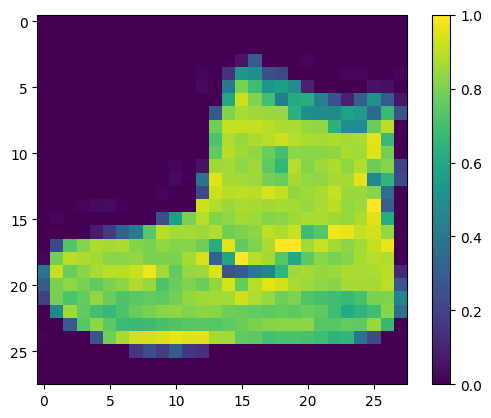

In [6]:
visualize_example(training_images[0])

## 1. Información sobre el dataset

Una vez tenemos los datos cargados en memoria, vamos a obtener información sobre los mismos.

**Pregunta 1.1 *(0.25 puntos)*** ¿Cuántas imágenes hay de *training* y de *test*? ¿Qué tamaño tienen las imágenes?

In [7]:
### Tu código aquí ###
training_size = len(training_images)
test_size = len(test_images)
print(f"Training size: {training_size} and Test size: {test_size}")
print(f"Image size (0th sample): {len(training_images[0])}x{len(training_images[0][0])} px.")

Training size: 60000 and Test size: 10000
Image size (0th sample): 28x28 px.


- Hay 60000 imágenes de entrenamiento y 10000 para test.
- Cada imagen es de 28 x 28 píxeles

**Pregunta 1.2 *(0.25 puntos)*** Realizar una exploración de las variables que contienen los datos. Describir en qué consiste un example del dataset (qué información se guarda en cada imagen) y describir qué contiene la información en y.

In [8]:
### Tu código aquí ###
print(f"Training images' shape: {training_images.shape}")
print(f"Test images' shape: {test_images.shape}")
print(f"Training labels' shape: {training_labels.shape}")
print(f"Test labels' shape: {test_labels.shape}")

Training images' shape: (60000, 28, 28)
Test images' shape: (10000, 28, 28)
Training labels' shape: (60000,)
Test labels' shape: (10000,)


El dataset completo contiene 60.000 imágenes en escala de grises de 28x28 píxeles y otras 10.000 para test.

Según lo que podemos leer en la [documentación](https://keras.io/api/datasets/fashion_mnist/) del dataset, lo que contienen las variables _y_ (`test_labels` y `training_labels`) son la categoría de las imágenes. En total podemos encontrar 9 categorías:

| Label | Description |
| ----- | ----------- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |


In [9]:
data_combined = np.hstack((training_labels, test_labels))
print(f"data_combined: {data_combined}")

data_combined: [9 0 0 ... 8 1 5]


In [12]:
frecuencias, categorias = np.histogram(data_combined, bins=10)
cats = ["0. T-shirt/top", "1. Trouser", "2. Pullover", "3. Dress", "4. Coat", "5. Sandal", "6. Shirt", "7. Sneaker", "8. Bag", "9. Ankle boot"]
slide = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, ]
print(f"frecuencias: {frecuencias}")
print(f"categorias: {categorias}")

frecuencias: [7000 7000 7000 7000 7000 7000 7000 7000 7000 7000]
categorias: [0.  0.9 1.8 2.7 3.6 4.5 5.4 6.3 7.2 8.1 9. ]


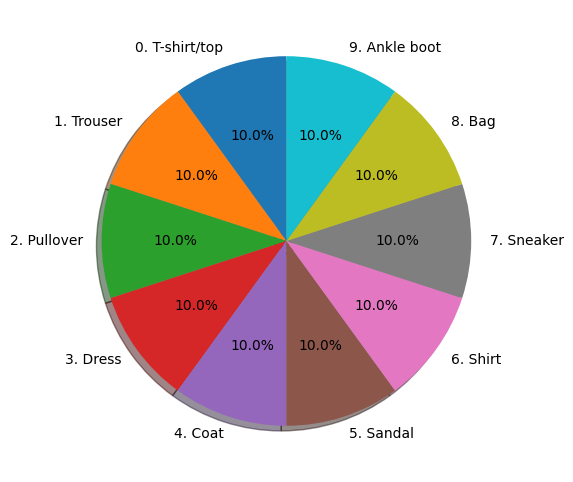

In [13]:
plt.figure(figsize=(6,6))
plt.pie(frecuencias, labels=cats, autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()
plt.close()

Como vemos, el dataset está balanceado.

## 2. Creación del Modelo

Ahora vamos a definir el modelo, pero antes vamos a repasar algunos comandos y conceptos muy útiles:
* **Sequential**: Eso define una SECUENCIA de capas en la red neuronal
* **Dense**: Añade una capa de neuronas
* **Flatten**: ¿Recuerdas cómo eran las imágenes cuando las imprimiste para poder verlas? Un cuadrado, Flatten toma ese cuadrado y lo convierte en un vector de una dimensión.

Cada capa de neuronas necesita una función de activación. Normalmente se usa la función relu en las capas intermedias y softmax en la ultima capa (en problemas de clasificación de más de dos items)
* **Relu** significa que "Si X>0 devuelve X, si no, devuelve 0", así que lo que hace es pasar sólo valores 0 o mayores a la siguiente capa de la red.
* **Softmax** toma un conjunto de valores, y escoge el más grande.

 **Pregunta 2.1 (2 puntos)**. Utilizando Keras, y preparando los datos de X e y como fuera necesario, define y entrena una red neuronal que sea capaz de clasificar imágenes de Fashion MNIST con las siguientes características:

* Una hidden layer de tamaños 128, utilizando unidades sigmoid.
* Optimizador Adam.
* Durante el entrenamiento, la red tiene que mostrar resultados de loss y accuracy por cada epoch.
* La red debe entrenar durante 10 epochs y batch size de 64.
* La última capa debe de ser una capa softmax.
* Tu red tendría que ser capaz de superar fácilmente 80% de accuracy.

In [10]:
def show_history_plot(p_hist):
    pd.DataFrame(p_hist.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()

In [15]:
from keras.src.utils import to_categorical
"""
 Como la dimensión de las etiquetas no coincide con la forma de las salidas
 de la red, tenemos que usar el método `to_categorical()`. De esta manera, 
 convierto las etiquetas en categóricas de un vector unidimensional a un 
 vector binario con una única salida activa (one-hot encoding).
"""
sc_training_labels = to_categorical(training_labels)
sc_test_labels = to_categorical(test_labels)

"""
    Dividimos los datos de entrenamiento en dos: 5000 los usaremos para validar el modelo y el resto para entrenar.
"""
X_valid, X_train = training_images[:5000], training_images[5000:]
y_valid, y_train = sc_training_labels[:5000], sc_training_labels[5000:]

In [16]:
# Definimos una serie de params.
my_epochs = 10
my_batch_size = 64

In [17]:
### Tu código para la red neuronal de la pregunta 2 aquí ###

# Definimos la arquitectura de la red neuronal
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

# Compilamos el modelo
model.compile(
    optimizer="adam",
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

# Entrenamos el modelo
history = model.fit(
    X_train, y_train, 
    epochs=my_epochs, batch_size=my_batch_size,
    validation_data=(X_valid, y_valid)
)

Epoch 1/10


2024-05-12 18:06:14.638012: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-05-12 18:06:14.864213: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f4fb88f4060 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-05-12 18:06:14.864252: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1070, Compute Capability 6.1
2024-05-12 18:06:14.880590: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-05-12 18:06:14.920384: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
I0000 00:00:1715529974.989342    5159 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


860/860 [==============================] - 5s 5ms/step - loss: 0.6115 - accuracy: 0.7952 - val_loss: 0.4407 - val_accuracy: 0.8476
Epoch 2/10
860/860 [==============================] - 4s 4ms/step - loss: 0.4198 - accuracy: 0.8505 - val_loss: 0.3923 - val_accuracy: 0.8618
Epoch 3/10
860/860 [==============================] - 4s 4ms/step - loss: 0.3804 - accuracy: 0.8639 - val_loss: 0.3653 - val_accuracy: 0.8680
Epoch 4/10
860/860 [==============================] - 4s 4ms/step - loss: 0.3560 - accuracy: 0.8727 - val_loss: 0.3536 - val_accuracy: 0.8748
Epoch 5/10
860/860 [==============================] - 4s 4ms/step - loss: 0.3371 - accuracy: 0.8786 - val_loss: 0.3445 - val_accuracy: 0.8788
Epoch 6/10
860/860 [==============================] - 4s 4ms/step - loss: 0.3226 - accuracy: 0.8840 - val_loss: 0.3275 - val_accuracy: 0.8818
Epoch 7/10
860/860 [==============================] - 4s 4ms/step - loss: 0.3095 - accuracy: 0.8871 - val_loss: 0.3200 - val_accuracy: 0.8834
Epoch 8/10
860/86

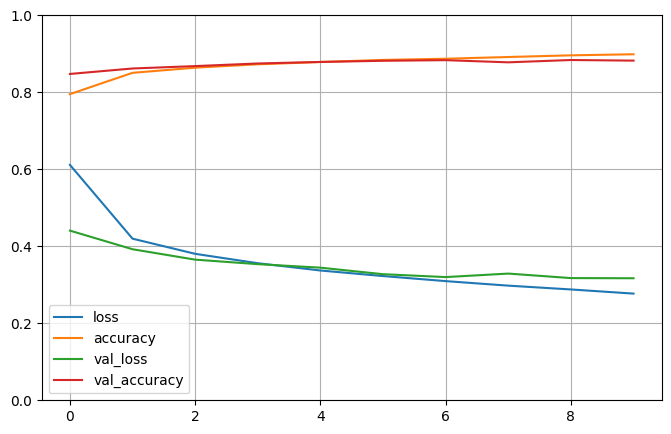

In [18]:
show_history_plot(history)

Para concluir el entrenamiento de la red neuronal, una buena practica es evaluar el modelo para ver si la precisión de entrenamiento es real

**pregunta 2.2 (0.5 puntos)**: evalua el modelo con las imagenes y etiquetas test.

In [19]:
### Tu código para la evaluación de la red neuronal de la pregunta 2 aquí ###
test_loss, test_acc = model.evaluate(test_images, sc_test_labels)
print(f"Precisión en test: {test_acc}")

313/313 [==============================] - 1s 4ms/step - loss: 0.3538 - accuracy: 0.8701
Precisión en test: 0.8701000213623047


Ahora vamos a explorar el código con una serie de ejercicios para alcanzar un grado de comprensión mayor sobre las redes neuronales y su entrenamiento.

## 3: Funcionamiento de las predicción de la red neuronal

Sigue los siguientes pasos: 

* Crea una variable llamada **classifications** para construir un clasificador con las imágenes de prueba, para ello puedes utilizar la función predict sobre el conjunto de test
* Imprime con la función print la primera entrada en las clasificaciones. 

**pregunta 3.1 (0.25 puntos)**, el resultado al imprimirlo es un vector de números, 
* ¿Por qué crees que ocurre esto, y qué representa este vector de números?

**pregunta 3.2 (0.25 puntos)**
* ¿Cúal es la clase de la primera entrada#  de la variable **classifications**? La respuesta puede ser un número o su etiqueta/clase equivalente.

In [20]:
### Tu código del clasificador de la pregunta 3 aquí ###
classifications = model.predict(test_images)
print(f"Primera entrada de classifications: {classifications[0]}")
print(f"La clase más probable es: {np.argmax(classifications[0])}")

313/313 [==============================] - 0s 1ms/step
Primera entrada de classifications: [5.91197931e-06 8.16145302e-07 3.84105042e-05 1.37011475e-05
 1.94878976e-05 2.65490152e-02 2.84083708e-05 4.09794524e-02
 4.45811718e-04 9.31918979e-01]
La clase más probable es: 9


Tu respuesta a la pregunta 3.1 aquí:


>El vector indica la probabilidad de que una imagen sea de una clase determinada, esto es, es un array de predicciones (lo dice la documentación de la función `predict`).

Tu respuesta a la pregunta 3.2 aquí:


> Es la probabilidad de ser Camiseta (T-shirt), la clase más probable

# **4: Impacto variar el número de neuronas en las capas ocultas**

En este ejercicio vamos a experimentar con nuestra red neuronal cambiando el numero de neuronas por 512 y por 1024. Para ello, utiliza la red neuronal de la pregunta 1, y su capa oculta cambia las 128 neuronas:

* **512 neuronas en la capa oculta
* **1024 neuronas en la capa oculta

y entrena la red en ambos casos.



In [58]:
### Tu código para 512 neuronas aquí ### --> no me voy a preocupar de modularizar el código -_-'

# Definimos la arquitectura de la red neuronal
model2 = Sequential()
model2.add(Flatten(input_shape=(28, 28)))
model2.add(Dense(512, activation='sigmoid'))
model2.add(Dense(10, activation='softmax'))

# Compilamos el modelo
model2.compile(
    optimizer="adam",
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

# Entrenamos el modelo
history2 = model2.fit(
    X_train, y_train, 
    epochs=my_epochs, batch_size=my_batch_size,
    validation_data=(X_valid, y_valid)
)

Epoch 1/10
860/860 [==============================] - 5s 5ms/step - loss: 0.5458 - accuracy: 0.8072 - val_loss: 0.4213 - val_accuracy: 0.8540
Epoch 2/10
860/860 [==============================] - 4s 4ms/step - loss: 0.4088 - accuracy: 0.8516 - val_loss: 0.3748 - val_accuracy: 0.8660
Epoch 3/10
860/860 [==============================] - 4s 4ms/step - loss: 0.3678 - accuracy: 0.8656 - val_loss: 0.3616 - val_accuracy: 0.8760
Epoch 4/10
860/860 [==============================] - 4s 4ms/step - loss: 0.3467 - accuracy: 0.8735 - val_loss: 0.3563 - val_accuracy: 0.8694
Epoch 5/10
860/860 [==============================] - 4s 4ms/step - loss: 0.3228 - accuracy: 0.8821 - val_loss: 0.3276 - val_accuracy: 0.8858
Epoch 6/10
860/860 [==============================] - 4s 4ms/step - loss: 0.3039 - accuracy: 0.8884 - val_loss: 0.3184 - val_accuracy: 0.8860
Epoch 7/10
860/860 [==============================] - 4s 4ms/step - loss: 0.2894 - accuracy: 0.8940 - val_loss: 0.3181 - val_accuracy: 0.8832
Epoch 

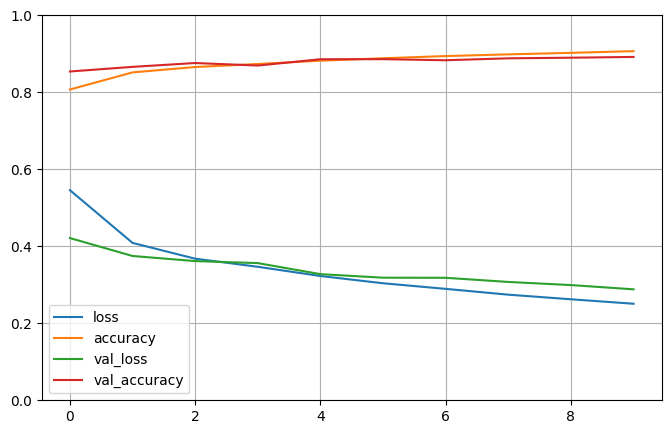

In [62]:
show_history_plot(history2)

In [63]:
test_loss2, test_acc2 = model2.evaluate(test_images, sc_test_labels)
print(f"Precisión en test2 (capa oculta con 512 neuronas): {test_acc2}")

313/313 [==============================] - 2s 5ms/step - loss: 0.3225 - accuracy: 0.8846
Precisión en test2 (capa oculta con 512 neuronas): 0.8845999836921692


In [20]:
### Tu código para 1024 neuronas aquí ###

# Definimos la arquitectura de la red neuronal
model3 = Sequential()
model3.add(Flatten(input_shape=(28, 28)))
model3.add(Dense(1024, activation='sigmoid'))
model3.add(Dense(10, activation='softmax'))

# Compilamos el modelo
model3.compile(
    optimizer="adam",
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

# Entrenamos el modelo
history3 = model3.fit(
    X_train, y_train, 
    epochs=my_epochs, batch_size=my_batch_size,
    validation_data=(X_valid, y_valid)
)

Epoch 1/10
938/938 [==============================] - 5s 5ms/step - loss: 0.5263 - accuracy: 0.8122 - val_loss: 0.4862 - val_accuracy: 0.8215
Epoch 2/10
938/938 [==============================] - 5s 5ms/step - loss: 0.4031 - accuracy: 0.8548 - val_loss: 0.4100 - val_accuracy: 0.8523
Epoch 3/10
938/938 [==============================] - 4s 5ms/step - loss: 0.3658 - accuracy: 0.8673 - val_loss: 0.4006 - val_accuracy: 0.8556
Epoch 4/10
938/938 [==============================] - 5s 5ms/step - loss: 0.3347 - accuracy: 0.8788 - val_loss: 0.3882 - val_accuracy: 0.8595
Epoch 5/10
938/938 [==============================] - 5s 5ms/step - loss: 0.3151 - accuracy: 0.8836 - val_loss: 0.3678 - val_accuracy: 0.8672
Epoch 6/10
938/938 [==============================] - 5s 5ms/step - loss: 0.2957 - accuracy: 0.8907 - val_loss: 0.3413 - val_accuracy: 0.8761
Epoch 7/10
938/938 [==============================] - 5s 5ms/step - loss: 0.2781 - accuracy: 0.8959 - val_loss: 0.3398 - val_accuracy: 0.8755
Epoch 

In [21]:
test_loss3, test_acc3 = model3.evaluate(test_images, sc_test_labels)
print(f"Precisión en test3 (capa oculta con 1024 neuronas): {test_acc3}")

313/313 [==============================] - 1s 4ms/step - loss: 0.3268 - accuracy: 0.8851
Precisión en test3 (capa oculta con 1024 neuronas): 0.8851000070571899


**pregunta 4.1 (0.5 puntos)**: ¿Cual es el impacto que tiene la red neuronal? Tu respuesta a la pregunta 4.1 aquí:

No parece que tenga impacto en la red neuronal. Vemos que la precisión es similar en los tres casos (en la primera 87%, la segunda el 88,1% y en la tercera 88,5%) y el tiempo de entrenamiento también es similar. Como hemos visto en clase, para mejorar un modelo no basta con añadir más neuronas, hay que jugar con otros aspectos de la arquitectura (como la cantidad de capas ocultas, jugando con su función de activación, etc).

Si ahora entrenais el modelo de esta forma (con 512 y 1024 neuronas en la capa oculta) y volveis a ejecutar el predictor guardado en la variable **classifications**, escribir el código del clasificador del ejercicio 1 de nuevo e imprimid el primer objeto guardado en la variable classifications.

**pregunta 4.2 (0.25 puntos)**: 

* ¿En que clase esta clasificado ahora la primera prenda de vestir de la variable classifications?

**pregunta 4.3 (0.25 puntos)**: 

* ¿Porque crees que ha ocurrido esto?

In [22]:
### Tu código del clasificador de la pregunta 5 aquí ###
classifications2 = model2.predict(test_images)
print(f"Primera entrada de classifications (RN de 512 neuronas en la hidden layer): {classifications2[0]}")

classifications3 = model3.predict(test_images)
print(f"Primera entrada de classifications (RN de 1024 neuronas en la hidden layer): {classifications3[0]}")

313/313 [==============================] - 1s 2ms/step
Primera entrada de classifications (RN de 512 neuronas en la hidden layer): [2.5232228e-07 5.5901697e-08 1.7176161e-07 8.3415067e-08 9.2156165e-07 5.2774983e-04 1.6683618e-06 1.1166436e-02 1.1765800e-05 9.8829085e-01]
313/313 [==============================] - 0s 1ms/step
Primera entrada de classifications (RN de 1024 neuronas en la hidden layer): [3.4134607e-07 3.4291073e-08 1.5165302e-06 2.1293488e-07 1.9874847e-06 6.1209360e-03 8.8406678e-06 2.8125957e-02 1.5933059e-06 9.6573859e-01]


In [25]:
for elem in classifications2[0]:
    print(f"{type(elem)}: {elem}")

<class 'numpy.float32'>: 3.346836763284955e-08
<class 'numpy.float32'>: 8.824453345823713e-08
<class 'numpy.float32'>: 2.3193929621356801e-07
<class 'numpy.float32'>: 4.5480766175387544e-07
<class 'numpy.float32'>: 1.0072408258565702e-06
<class 'numpy.float32'>: 0.0015400113770738244
<class 'numpy.float32'>: 1.8585524230729789e-06
<class 'numpy.float32'>: 0.005922006908804178
<class 'numpy.float32'>: 2.453641536703799e-05
<class 'numpy.float32'>: 0.9925098419189453


Tu respuesta a la pregunta 5.1 aquí:

Está clasificando como `9 Ankle boot` con 512 neuronas en la HL, igual que en la de 1024. 

Tu respuesta a la pregunta 5.2 aquí:

Del mismo modo que no hemos variado la arquitectura nada más que en la cantidad de neuronas de la HL, tampoco varía el modo de clasificar.

# **5: Capa Flatten**

En este ejercicio vamos a ver que ocurre cuando quitamos la capa flatten, para ello, escribe la red neuronal de la pregunta 1 y no pongas la capa Flatten.

**pregunta 5 (0.5 puntos):** ¿puedes explicar porque da el error que da?



In [13]:
### Tu código de la red neuronal sin capa flatten de la pregunta 6 aquí ###

# Definimos la arquitectura de la red neuronal
model5 = Sequential()
#model5.add(Flatten(input_shape=(28, 28)))
model5.add(Dense(128, activation='sigmoid'))
model5.add(Dense(10, activation='softmax'))

# Compilamos el modelo
model5.compile(
    optimizer="adam",
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

# Entrenamos el modelo
history5 = model5.fit(
    X_train, y_train, 
    epochs=my_epochs, batch_size=my_batch_size,
    validation_data=(X_valid, y_valid)
)

2024-05-12 18:04:09.340986: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-12 18:04:09.535139: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-12 18:04:09.535180: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-12 18:04:09.537715: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-12 18:04:09.537777: I external/local_xla/xla/stream_executor

Epoch 1/10


ValueError: in user code:

    File "/home/joninazio/.virtualenvs/mia-sca-act1/lib/python3.10/site-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/home/joninazio/.virtualenvs/mia-sca-act1/lib/python3.10/site-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/joninazio/.virtualenvs/mia-sca-act1/lib/python3.10/site-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/home/joninazio/.virtualenvs/mia-sca-act1/lib/python3.10/site-packages/keras/src/engine/training.py", line 1151, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/home/joninazio/.virtualenvs/mia-sca-act1/lib/python3.10/site-packages/keras/src/engine/training.py", line 1209, in compute_loss
        return self.compiled_loss(
    File "/home/joninazio/.virtualenvs/mia-sca-act1/lib/python3.10/site-packages/keras/src/engine/compile_utils.py", line 277, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/home/joninazio/.virtualenvs/mia-sca-act1/lib/python3.10/site-packages/keras/src/losses.py", line 143, in __call__
        losses = call_fn(y_true, y_pred)
    File "/home/joninazio/.virtualenvs/mia-sca-act1/lib/python3.10/site-packages/keras/src/losses.py", line 270, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/home/joninazio/.virtualenvs/mia-sca-act1/lib/python3.10/site-packages/keras/src/losses.py", line 2221, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/home/joninazio/.virtualenvs/mia-sca-act1/lib/python3.10/site-packages/keras/src/backend.py", line 5573, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 10) and (None, 28, 10) are incompatible


Tu respuesta a la pregunta 5 aquí:

La capa de entrada se tiene que adecuar al tipo de información que va a ingestar la red neuronal. En nuestro caso, tenemos unas imágenes de un tamaño en píxeles de 28x28. Si quitamos la capa `Flatten`, le estamos introduciendo al modelo cada imagen en una forma que no es adecuada para que funcione, que es justo lo que hace Flatten: _convertir_ el array bidimensional de 28x28 en un array unidimensional de datos procesable.

# **6: Número de neuronas de la capa de salida**
Considerad la capa final, la de salida de la red neuronal de la pregunta 1.

**pregunta 6.1 (0.25 puntos)**: ¿Por qué son 10 las neuronas de la última capa?

**pregunta 6.2 (0.25 puntos)**: ¿Qué pasaría si tuvieras una cantidad diferente a 10? 

Por ejemplo, intenta entrenar la red con 5, para ello utiliza la red neuronal de la pregunta 1 y cambia a 5 el número de neuronas en la última capa.

In [14]:
### Tu código de la red neuronal con 5 neuronas en la capa de salida de la pregunta 7 aquí ###

# Definimos la arquitectura de la red neuronal
model6 = Sequential()
model6.add(Flatten(input_shape=(28, 28)))
model6.add(Dense(128, activation='sigmoid'))
model6.add(Dense(5, activation='softmax'))

# Compilamos el modelo
model6.compile(
    optimizer="adam",
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

# Entrenamos el modelo
history6 = model6.fit(
    X_train, y_train, 
    epochs=my_epochs, batch_size=my_batch_size,
    validation_data=(X_valid, y_valid)
)

Epoch 1/10


ValueError: in user code:

    File "/home/joninazio/.virtualenvs/mia-sca-act1/lib/python3.10/site-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/home/joninazio/.virtualenvs/mia-sca-act1/lib/python3.10/site-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/joninazio/.virtualenvs/mia-sca-act1/lib/python3.10/site-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/home/joninazio/.virtualenvs/mia-sca-act1/lib/python3.10/site-packages/keras/src/engine/training.py", line 1151, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/home/joninazio/.virtualenvs/mia-sca-act1/lib/python3.10/site-packages/keras/src/engine/training.py", line 1209, in compute_loss
        return self.compiled_loss(
    File "/home/joninazio/.virtualenvs/mia-sca-act1/lib/python3.10/site-packages/keras/src/engine/compile_utils.py", line 277, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/home/joninazio/.virtualenvs/mia-sca-act1/lib/python3.10/site-packages/keras/src/losses.py", line 143, in __call__
        losses = call_fn(y_true, y_pred)
    File "/home/joninazio/.virtualenvs/mia-sca-act1/lib/python3.10/site-packages/keras/src/losses.py", line 270, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/home/joninazio/.virtualenvs/mia-sca-act1/lib/python3.10/site-packages/keras/src/losses.py", line 2221, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/home/joninazio/.virtualenvs/mia-sca-act1/lib/python3.10/site-packages/keras/src/backend.py", line 5573, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 10) and (None, 5) are incompatible


Tu respuestas a la pregunta 6.1 aquí:

Son 10 neuronas porque son 10 las clases cuyas probabilidades queremos predecir entrenando la red neuronal. En otras palabras, el resultado es la probabilidad de cada clase (que si hacemos el sumando el resultado es 1).

Tu respuestas a la pregunta 6.2 aquí:

Que hay incompatibilidad de datos, puesto tenemos 10 clases pero le estamos diciendo a la red neuronal que nos tiene que predecir 5, lo que incurre en el error.

# 7: Aumento de epoch y su efecto en la red neuronal
En este ejercicio vamos a ver el impacto de aumentar los epoch en el entrenamiento. Usando la red neuronal de la pregunta 1:

**pregunta 7.1 (0.15 puntos)**
* Intentad 15 epoch para su entrenamiento, probablemente obtendras un modelo con una pérdida mucho mejor que el que tiene 5.

**pregunta 7.2 (0.15 puntos)**
* Intenta ahora con 30 epoch para su entrenamiento, podrás ver que el valor de la pérdida deja de disminuir, y a veces aumenta.

**pregunta 7.3 (0.30 puntos)**
* ¿Porque que piensas que ocurre esto? Explica tu respuesta y da el nombre de este efecto si lo conoces.

In [26]:
### Tu código para 15 epoch aquí ###

# Definimos la arquitectura de la red neuronal
model7a = Sequential()
model7a.add(Flatten(input_shape=(28, 28)))
model7a.add(Dense(128, activation='sigmoid'))
model7a.add(Dense(10, activation='softmax'))

# Compilamos el modelo
model7a.compile(
    optimizer="adam",
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

# Entrenamos el modelo
history7a = model7a.fit(
    X_train, y_train, 
    epochs=15, batch_size=my_batch_size,
    validation_data=(X_valid, y_valid)
)

Epoch 1/15
938/938 [==============================] - 5s 5ms/step - loss: 0.5982 - accuracy: 0.8018 - val_loss: 0.4698 - val_accuracy: 0.8333
Epoch 2/15
938/938 [==============================] - 4s 5ms/step - loss: 0.4143 - accuracy: 0.8521 - val_loss: 0.4236 - val_accuracy: 0.8503
Epoch 3/15
938/938 [==============================] - 4s 5ms/step - loss: 0.3752 - accuracy: 0.8646 - val_loss: 0.3941 - val_accuracy: 0.8577
Epoch 4/15
938/938 [==============================] - 4s 5ms/step - loss: 0.3516 - accuracy: 0.8729 - val_loss: 0.3932 - val_accuracy: 0.8577
Epoch 5/15
938/938 [==============================] - 6s 7ms/step - loss: 0.3329 - accuracy: 0.8789 - val_loss: 0.3779 - val_accuracy: 0.8640
Epoch 6/15
938/938 [==============================] - 7s 7ms/step - loss: 0.3180 - accuracy: 0.8852 - val_loss: 0.3651 - val_accuracy: 0.8687
Epoch 7/15
938/938 [==============================] - 7s 7ms/step - loss: 0.3053 - accuracy: 0.8894 - val_loss: 0.3518 - val_accuracy: 0.8729
Epoch 

In [27]:
test_loss7a, test_acc7a = model7a.evaluate(test_images, sc_test_labels)
print(f"Precisión con epoch de 15: {test_acc7a}")

313/313 [==============================] - 1s 4ms/step - loss: 0.3269 - accuracy: 0.8838
Precisión con epoch de 15: 0.8838000297546387


In [44]:
### Tu código para 30 epoch aquí ###

# Definimos la arquitectura de la red neuronal
model7b = Sequential()
model7b.add(Flatten(input_shape=(28, 28)))
model7b.add(Dense(128, activation='sigmoid'))
model7b.add(Dense(10, activation='softmax'))

# Compilamos el modelo
model7b.compile(
    optimizer="adam",
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

# Entrenamos el modelo
history7b = model7b.fit(
    X_train, y_train, 
    epochs=30, batch_size=my_batch_size,
    validation_data=(X_valid, y_valid)
)

Epoch 1/30
938/938 [==============================] - 8s 8ms/step - loss: 0.6045 - accuracy: 0.7980 - val_loss: 0.4674 - val_accuracy: 0.8356
Epoch 2/30
938/938 [==============================] - 7s 8ms/step - loss: 0.4150 - accuracy: 0.8519 - val_loss: 0.4159 - val_accuracy: 0.8488
Epoch 3/30
938/938 [==============================] - 7s 8ms/step - loss: 0.3760 - accuracy: 0.8646 - val_loss: 0.3974 - val_accuracy: 0.8583
Epoch 4/30
938/938 [==============================] - 7s 7ms/step - loss: 0.3512 - accuracy: 0.8738 - val_loss: 0.3864 - val_accuracy: 0.8624
Epoch 5/30
938/938 [==============================] - 7s 7ms/step - loss: 0.3314 - accuracy: 0.8797 - val_loss: 0.3686 - val_accuracy: 0.8687
Epoch 6/30
938/938 [==============================] - 7s 7ms/step - loss: 0.3163 - accuracy: 0.8859 - val_loss: 0.3634 - val_accuracy: 0.8688
Epoch 7/30
938/938 [==============================] - 7s 7ms/step - loss: 0.3038 - accuracy: 0.8894 - val_loss: 0.3557 - val_accuracy: 0.8736
Epoch 

In [45]:
test_loss7b, test_acc7b = model7b.evaluate(test_images, sc_test_labels)
print(f"Precisión con epoch de 30: {test_acc7b}")

313/313 [==============================] - 1s 4ms/step - loss: 0.3436 - accuracy: 0.8862
Precisión con epoch de 30: 0.8862000107765198


Tu respuesta a la pregunta 7.3 aquí:

Las epochs son las pasadas que tiene que hacer la red neuronal y, como de costumbre, no siempre más es mejor. Llega un momento que el modelo se aprende excesivamente bien los datos y, en consecuencia, pierde capacidad para predecir datos nuevos. A este efecto se le llama **sobreajuste** u **overfitting**. 

# 8: Early stop
En el ejercicio anterior, cuando entrenabas con epoch extras, tenías un problema en el que tu pérdida podía cambiar. Puede que te haya llevado un poco de tiempo esperar a que el entrenamiento lo hiciera,  y puede que hayas pensado "¿no estaría bien si pudiera parar el entrenamiento cuando alcance un valor deseado?", es decir, una precisión del 85% podría ser suficiente para ti, y si alcanzas eso después de 3 epoch, ¿por qué sentarte a esperar a que termine muchas más épocas? Como cualquier otro programa existen formas de parar la ejecución

A partir del código de ejemplo, hacer una nueva función que tenga en cuenta la perdida (loss) y que pueda parar el código para evitar que ocurra el efeto secundario que vimos en el ejercicio 5.

In [69]:
### Ejemplo de código

class CallbackAccuracy85(tf.keras.callbacks.Callback):
      def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') > 0.85:
              print(f"\nAlcanzado el 85% de precisión ({logs.get('accuracy')}) en la epoch {epoch}, se cancela el entrenamiento!!")
              self.model.stop_training = True

In [70]:
class CallbackLoss40(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('loss') > 0.40:
            print(f"\nSe ha superado una pérdida del 40% ({logs.get('loss')}) en la epoch {epoch}, se cancela el entrenamiento!!")
            self.model.stop_training = True

**Ejercicio 8 *(0.75 puntos)***: Completa el siguiente código con una clase callback que una vez alcanzado el 40% de perdida detenga el entrenamiento.

In [71]:
import tensorflow as tf
print(tf.__version__)

### Tu código de la función callback para parar el entrenamiento de la red neuronal al 40% de loss aqui: ###

callbacks = [CallbackAccuracy85(), CallbackLoss40()]
mnist8 = tf.keras.datasets.fashion_mnist
(training_images8, training_labels8) ,  (test_images8, test_labels8) = mnist8.load_data()

training_images8 = training_images8/255.0
test_images8 = test_images8/255.0


X_valid8, X_train8 = training_images8[:5000], training_images8[5000:]
y_valid8, y_train8 = training_labels8[:5000], training_labels8[5000:]


model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy']) 

model.fit(X_train8, y_train8, epochs=50, callbacks=[callbacks], validation_data=(X_valid8, y_valid8))

2.15.1
Epoch 1/50
1705/1719 [============================>.] - ETA: 0s - loss: 0.4797 - accuracy: 0.8291
Se ha superado una pérdida del 40% (0.4794620871543884) en la epoch 0, se cancela el entrenamiento!!
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4795 - accuracy: 0.8291 - val_loss: 0.3632 - val_accuracy: 0.8660


## 9. Unidades de activación

En este ejercicio, vamos a evaluar la importancia de utilizar las unidades de activación adecuadas. Como hemos visto en clase, funciones de activación como sigmoid han dejado de utilizarse en favor de otras unidades como ReLU.

**Ejercicio 9 *(0.75 puntos)***: Partiendo de una red sencilla como la desarrollada en el Trabajo 1, escribir un breve análisis comparando la utilización de unidades sigmoid y ReLU (por ejemplo, se pueden comentar aspectos como velocidad de convergencia, métricas obtenidas...). Explicar por qué pueden darse estas diferencias. Opcionalmente, comparar con otras activaciones disponibles en Keras.

*Pista: Usando redes más grandes se hace más sencillo apreciar las diferencias. Es mejor utilizar al menos 3 o 4 capas densas.*

In [ ]:
## Tu código y comentarios de texto aquí
## Puedes incluir tantas celdas como quieras
## No olvides utilizar celdas de Markdown para texto


>Vamos a trabajar con las siguientes características:
- Epochs: 40
- Batch size: 64
- Cantidad de capas densas (ocultas): 4
- Casos a analizar usando las siguientes unidades de activación: `sigmoid`, `relu`, `tanh`
- Early stop: al llegar al 90% de accuracy <-- al final no la usamos, ya que no permitimos ir más allá y mejorar posiblemente la validación final del modelo entrenado.

In [72]:
epochs_9 = 40
batch_size_9 = 64

In [73]:
class CallbackAccuracy95(tf.keras.callbacks.Callback):
      def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') > 0.95:
              print(f"\nAlcanzado el 95% de precisión ({logs.get('accuracy')}) en la epoch {epoch}, se cancela el entrenamiento!!")
              self.model.stop_training = True

#### 9.1: Sigmoid

In [87]:
# Definimos la arquitectura de la red neuronal
model9s = Sequential()
model9s.add(Flatten(input_shape=(28, 28)))
model9s.add(Dense(128, activation='sigmoid'))
model9s.add(Dense(128, activation='sigmoid'))
model9s.add(Dense(128, activation='sigmoid'))
model9s.add(Dense(128, activation='sigmoid'))
model9s.add(Dense(10, activation='softmax'))

# Compilamos el modelo
model9s.compile(
    optimizer="adam",
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

# Entrenamos el modelo
history9s = model9s.fit(
    X_train, y_train, 
    epochs=epochs_9, batch_size=batch_size_9,
    #callbacks=[CallbackAccuracy95()],
    validation_data=(X_valid, y_valid)
)

Epoch 1/40
860/860 [==============================] - 6s 6ms/step - loss: 0.9100 - accuracy: 0.6520 - val_loss: 0.5410 - val_accuracy: 0.7936
Epoch 2/40
860/860 [==============================] - 4s 5ms/step - loss: 0.4866 - accuracy: 0.8235 - val_loss: 0.4547 - val_accuracy: 0.8394
Epoch 3/40
860/860 [==============================] - 4s 5ms/step - loss: 0.4104 - accuracy: 0.8535 - val_loss: 0.4111 - val_accuracy: 0.8560
Epoch 4/40
860/860 [==============================] - 5s 5ms/step - loss: 0.3680 - accuracy: 0.8667 - val_loss: 0.3579 - val_accuracy: 0.8730
Epoch 5/40
860/860 [==============================] - 5s 6ms/step - loss: 0.3433 - accuracy: 0.8774 - val_loss: 0.3395 - val_accuracy: 0.8834
Epoch 6/40
860/860 [==============================] - 5s 6ms/step - loss: 0.3254 - accuracy: 0.8833 - val_loss: 0.3424 - val_accuracy: 0.8772
Epoch 7/40
860/860 [==============================] - 5s 6ms/step - loss: 0.3112 - accuracy: 0.8869 - val_loss: 0.3334 - val_accuracy: 0.8774
Epoch 

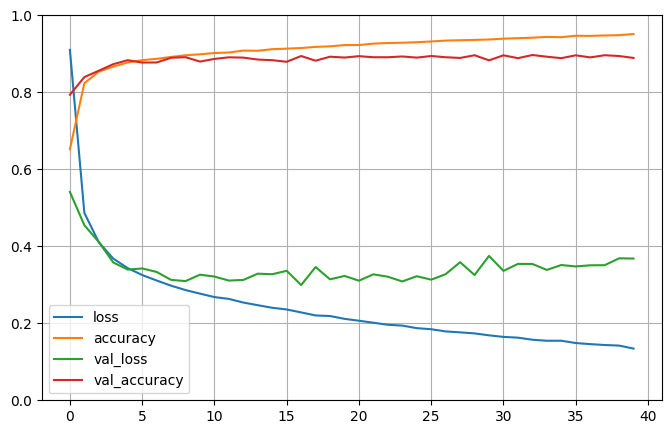

In [88]:
show_history_plot(history9s)

In [89]:
model9s.evaluate(test_images, sc_test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.4022 - accuracy: 0.8790


[0.40220561623573303, 0.8790000081062317]

#### 9.2: ReLU

In [90]:
# Definimos la arquitectura de la red neuronal
model9r = Sequential()
model9r.add(Flatten(input_shape=(28, 28)))
model9r.add(Dense(128, activation='relu'))
model9r.add(Dense(128, activation='relu'))
model9r.add(Dense(128, activation='relu'))
model9r.add(Dense(128, activation='relu'))
model9r.add(Dense(10, activation='softmax'))

# Compilamos el modelo
model9r.compile(
    optimizer="adam",
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

# Entrenamos el modelo
history9r = model9r.fit(
    X_train, y_train, 
    epochs=epochs_9, batch_size=batch_size_9,
#    callbacks=[CallbackAccuracy95()],
    validation_data=(X_valid, y_valid)
)

Epoch 1/40
860/860 [==============================] - 7s 7ms/step - loss: 0.5215 - accuracy: 0.8121 - val_loss: 0.3915 - val_accuracy: 0.8588
Epoch 2/40
860/860 [==============================] - 5s 6ms/step - loss: 0.3777 - accuracy: 0.8612 - val_loss: 0.3692 - val_accuracy: 0.8628
Epoch 3/40
860/860 [==============================] - 5s 5ms/step - loss: 0.3387 - accuracy: 0.8746 - val_loss: 0.3542 - val_accuracy: 0.8724
Epoch 4/40
860/860 [==============================] - 5s 5ms/step - loss: 0.3154 - accuracy: 0.8825 - val_loss: 0.3635 - val_accuracy: 0.8696
Epoch 5/40
860/860 [==============================] - 5s 5ms/step - loss: 0.2989 - accuracy: 0.8885 - val_loss: 0.3189 - val_accuracy: 0.8826
Epoch 6/40
860/860 [==============================] - 6s 7ms/step - loss: 0.2853 - accuracy: 0.8938 - val_loss: 0.3125 - val_accuracy: 0.8874
Epoch 7/40
860/860 [==============================] - 5s 6ms/step - loss: 0.2708 - accuracy: 0.8974 - val_loss: 0.3010 - val_accuracy: 0.8918
Epoch 

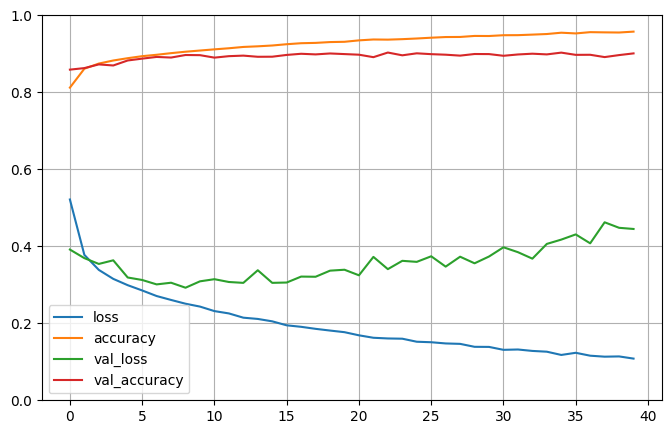

In [91]:
show_history_plot(history9r)

In [92]:
model9r.evaluate(test_images, sc_test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.4880 - accuracy: 0.8907


[0.4880443215370178, 0.8906999826431274]

#### 9.3: Tanh

In [93]:
# Definimos la arquitectura de la red neuronal
model9t = Sequential()
model9t.add(Flatten(input_shape=(28, 28)))
model9t.add(Dense(128, activation='tanh'))
model9t.add(Dense(128, activation='tanh'))
model9t.add(Dense(128, activation='tanh'))
model9t.add(Dense(128, activation='tanh'))
model9t.add(Dense(10, activation='softmax'))

# Compilamos el modelo
model9t.compile(
    optimizer="adam",
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

# Entrenamos el modelo
history9t = model9t.fit(
    X_train, y_train, 
    epochs=epochs_9, batch_size=batch_size_9,
#    callbacks=[CallbackAccuracy95()],
    validation_data=(X_valid, y_valid)
)

Epoch 1/40
860/860 [==============================] - 6s 5ms/step - loss: 0.4902 - accuracy: 0.8214 - val_loss: 0.3791 - val_accuracy: 0.8628
Epoch 2/40
860/860 [==============================] - 4s 5ms/step - loss: 0.3749 - accuracy: 0.8614 - val_loss: 0.3816 - val_accuracy: 0.8600
Epoch 3/40
860/860 [==============================] - 4s 5ms/step - loss: 0.3375 - accuracy: 0.8739 - val_loss: 0.3294 - val_accuracy: 0.8784
Epoch 4/40
860/860 [==============================] - 4s 5ms/step - loss: 0.3139 - accuracy: 0.8841 - val_loss: 0.3119 - val_accuracy: 0.8866
Epoch 5/40
860/860 [==============================] - 4s 5ms/step - loss: 0.3003 - accuracy: 0.8874 - val_loss: 0.3172 - val_accuracy: 0.8824
Epoch 6/40
860/860 [==============================] - 4s 5ms/step - loss: 0.2842 - accuracy: 0.8935 - val_loss: 0.3565 - val_accuracy: 0.8752
Epoch 7/40
860/860 [==============================] - 5s 6ms/step - loss: 0.2718 - accuracy: 0.8985 - val_loss: 0.3346 - val_accuracy: 0.8752
Epoch 

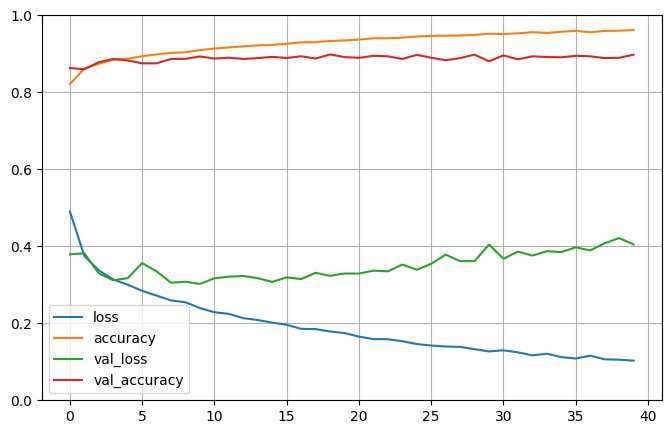

In [94]:
show_history_plot(history9t)

In [95]:
model9t.evaluate(test_images, sc_test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.4272 - accuracy: 0.8902


[0.42722123861312866, 0.8902000188827515]

#### 9.4: Conclusiones

Las funciones de activación son un elemento extremadamente relevantes en las redes neuronales, debido a que son las que introducen la no linealidad. De este modo pueden aprender relaciones complejas. 

La convergencia que más tardía ha sido usando la sigmoide, de hecho ha llegado a superar el 96% en la última epoch (cuando he ejecutado el modelo con un early stop del 95%, pero lo he quitado porque me daba la sensación de que podía conseguir mejores resultados, y así ha sido). En el caso de tanh y relu y con el early stop, ha llegado antes, en la 31 y 33 respectivamente. Las neuronas con funciones de activación sigmoide suelen tender a una convergencia más lenta. 

En cuanto a precisión, los modelos resultantes han obtenido resultados similares con early stop. Sin ES, en tanh he conseguido 89,02%, en ReLU un 89,07% y con sigmoid un 87,9%, lo que implica una variación del 1% aproximadamente.

Sin embargo, en cuanto a pérdida sí que se pueden apreciar diferencias. De hecho, la ReLU ha alcanzado una pérdida del 48,8% (46% en early stop), comparando con el 42,7% (37% en early stop) de tanh y 40,2% (39% en early stop) de sigmoid. Esto puede deberse por varias razones, como por ejemplo que se esté saturando la función relu o que la arquitectura o configuración de la red haya perjudicado en ese sentido. 

## 10. Inicialización de parámetros

En este ejercicio, vamos a evaluar la importancia de una correcta inicialización de parámetros en una red neuronal.

**Ejercicio 10 *(0.75 puntos)***: Partiendo de una red similar a la del ejercicio anterior (usando ya ReLUs), comentar las diferencias que se aprecian en el entrenamiento al utilizar distintas estrategias de inicialización de parámetros. Para ello, inicializar todas las capas con las siguientes estrategias, disponibles en Keras, y analizar sus diferencias:

* Inicialización con ceros.
* Inicialización con una variable aleatoria normal.
* Inicialización con los valores por defecto de Keras para una capa Dense (estrategia *glorot uniform*)

In [24]:
## Tu código y comentarios de texto aquí
## Puedes incluir tantas celdas como quieras
## No olvides utilizar celdas de Markdown para texto

epochs_10 = 50
batch_size_10 = 64

In [32]:
"""
 Usarlo así:
 
zeros --> Zeros()
random --> RandomNormal(mean=0.0, stddev=0.01)
florot --> GlorotUniform(seed=0.1)

"""

#### 10.1. Inicializando con Zeros

In [96]:
# Definimos la arquitectura de la red neuronal
model10_zeros = Sequential()
model10_zeros.add(Flatten(input_shape=(28, 28)))
model10_zeros.add(Dense(128, activation='relu', bias_initializer=Zeros(), kernel_initializer=Zeros()))
model10_zeros.add(Dense(128, activation='relu', bias_initializer=Zeros(), kernel_initializer=Zeros()))
model10_zeros.add(Dense(128, activation='relu', bias_initializer=Zeros(), kernel_initializer=Zeros()))
model10_zeros.add(Dense(128, activation='relu', bias_initializer=Zeros(), kernel_initializer=Zeros()))
model10_zeros.add(Dense(10, activation='softmax'))

# Compilamos el modelo
model10_zeros.compile(
    optimizer="adam",
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

# Entrenamos el modelo
history10_zeros = model10_zeros.fit(
    X_train, y_train, 
    epochs=epochs_10, batch_size=batch_size_10,
    #callbacks=[CallbackAccuracy95()],
    validation_data=(X_valid, y_valid)
)

Epoch 1/50
860/860 [==============================] - 6s 6ms/step - loss: 2.3027 - accuracy: 0.0973 - val_loss: 2.3030 - val_accuracy: 0.0914
Epoch 2/50
860/860 [==============================] - 5s 6ms/step - loss: 2.3027 - accuracy: 0.0985 - val_loss: 2.3031 - val_accuracy: 0.0914
Epoch 3/50
860/860 [==============================] - 5s 6ms/step - loss: 2.3027 - accuracy: 0.0982 - val_loss: 2.3028 - val_accuracy: 0.0986
Epoch 4/50
860/860 [==============================] - 5s 6ms/step - loss: 2.3027 - accuracy: 0.0984 - val_loss: 2.3028 - val_accuracy: 0.0914
Epoch 5/50
860/860 [==============================] - 5s 6ms/step - loss: 2.3027 - accuracy: 0.0982 - val_loss: 2.3029 - val_accuracy: 0.0976
Epoch 6/50
860/860 [==============================] - 5s 6ms/step - loss: 2.3027 - accuracy: 0.0994 - val_loss: 2.3028 - val_accuracy: 0.1002
Epoch 7/50
860/860 [==============================] - 5s 6ms/step - loss: 2.3027 - accuracy: 0.0997 - val_loss: 2.3026 - val_accuracy: 0.1008
Epoch 

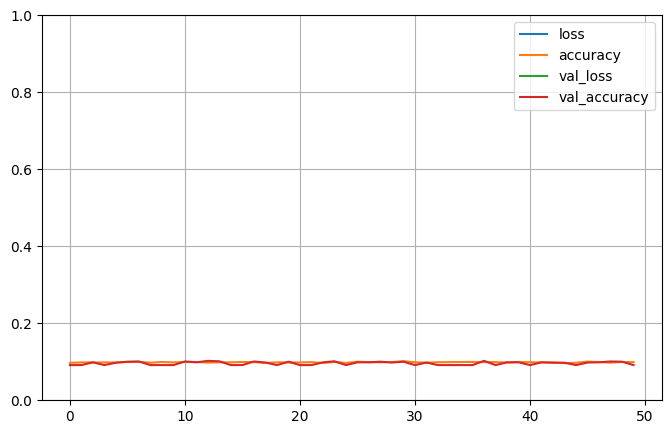

In [97]:
show_history_plot(history10_zeros)

In [98]:
model10_zeros.evaluate(test_images, sc_test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1000


[2.3025999069213867, 0.10000000149011612]

#### 10.2. Inicialización con RandomNormal

In [107]:
# Definimos la arquitectura de la red neuronal
model10_rn = Sequential()
model10_rn.add(Flatten(input_shape=(28, 28)))
model10_rn.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(), bias_initializer=Zeros()))
model10_rn.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(), bias_initializer=Zeros()))
model10_rn.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(), bias_initializer=Zeros()))
model10_rn.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(), bias_initializer=Zeros()))
model10_rn.add(Dense(10, activation='softmax'))

# Compilamos el modelo
model10_rn.compile(
    optimizer="adam",
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

# Entrenamos el modelo
history10_rn = model10_rn.fit(
    X_train, y_train, 
    epochs=epochs_10, batch_size=batch_size_10,
#    callbacks=[CallbackAccuracy95()],
    validation_data=(X_valid, y_valid)
)

Epoch 1/50
860/860 [==============================] - 6s 5ms/step - loss: 0.5553 - accuracy: 0.7970 - val_loss: 0.3873 - val_accuracy: 0.8582
Epoch 2/50
860/860 [==============================] - 4s 5ms/step - loss: 0.3845 - accuracy: 0.8596 - val_loss: 0.3505 - val_accuracy: 0.8762
Epoch 3/50
860/860 [==============================] - 4s 5ms/step - loss: 0.3431 - accuracy: 0.8731 - val_loss: 0.3309 - val_accuracy: 0.8796
Epoch 4/50
860/860 [==============================] - 4s 5ms/step - loss: 0.3189 - accuracy: 0.8826 - val_loss: 0.3290 - val_accuracy: 0.8812
Epoch 5/50
860/860 [==============================] - 4s 5ms/step - loss: 0.2982 - accuracy: 0.8908 - val_loss: 0.3187 - val_accuracy: 0.8854
Epoch 6/50
860/860 [==============================] - 4s 5ms/step - loss: 0.2879 - accuracy: 0.8927 - val_loss: 0.3123 - val_accuracy: 0.8908
Epoch 7/50
860/860 [==============================] - 4s 5ms/step - loss: 0.2750 - accuracy: 0.8976 - val_loss: 0.3053 - val_accuracy: 0.8904
Epoch 

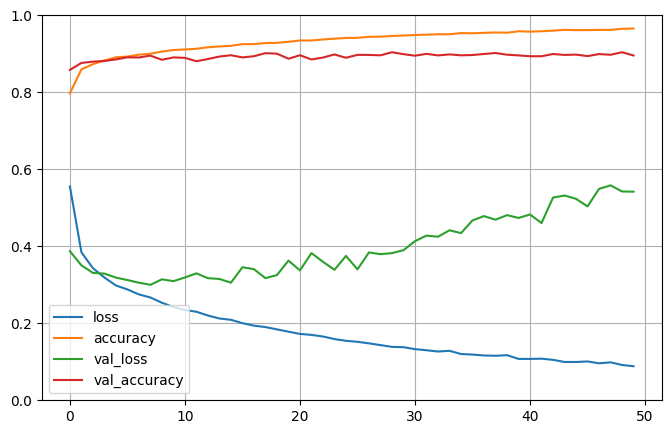

In [108]:
show_history_plot(history10_rn)

In [109]:
model10_rn.evaluate(test_images, sc_test_labels)

313/313 [==============================] - 1s 5ms/step - loss: 0.5998 - accuracy: 0.8877


[0.5998170971870422, 0.8877000212669373]

> Creo que podemos dejarlo en 28 epochs, aunque se aprecia como crece el overfitting bastante.

##### 10.2.1. Con 28 epochs

In [25]:
# Definimos la arquitectura de la red neuronal
model10_rn28 = Sequential()
model10_rn28.add(Flatten(input_shape=(28, 28)))
model10_rn28.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(), bias_initializer=Zeros()))
model10_rn28.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(), bias_initializer=Zeros()))
model10_rn28.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(), bias_initializer=Zeros()))
model10_rn28.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(), bias_initializer=Zeros()))
model10_rn28.add(Dense(10, activation='softmax'))

# Compilamos el modelo
model10_rn28.compile(
    optimizer="adam",
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

# Entrenamos el modelo
history10_rn28 = model10_rn28.fit(
    X_train, y_train, 
    epochs=28, batch_size=batch_size_10,
    validation_data=(X_valid, y_valid)
)

Epoch 1/28
860/860 [==============================] - 8s 8ms/step - loss: 0.5502 - accuracy: 0.8011 - val_loss: 0.3794 - val_accuracy: 0.8672
Epoch 2/28
860/860 [==============================] - 5s 5ms/step - loss: 0.3831 - accuracy: 0.8614 - val_loss: 0.3663 - val_accuracy: 0.8692
Epoch 3/28
860/860 [==============================] - 5s 5ms/step - loss: 0.3423 - accuracy: 0.8738 - val_loss: 0.3618 - val_accuracy: 0.8714
Epoch 4/28
860/860 [==============================] - 5s 5ms/step - loss: 0.3181 - accuracy: 0.8829 - val_loss: 0.3404 - val_accuracy: 0.8770
Epoch 5/28
860/860 [==============================] - 5s 6ms/step - loss: 0.3003 - accuracy: 0.8881 - val_loss: 0.3136 - val_accuracy: 0.8850
Epoch 6/28
860/860 [==============================] - 5s 5ms/step - loss: 0.2844 - accuracy: 0.8941 - val_loss: 0.3220 - val_accuracy: 0.8812
Epoch 7/28
860/860 [==============================] - 5s 5ms/step - loss: 0.2706 - accuracy: 0.8973 - val_loss: 0.3252 - val_accuracy: 0.8826
Epoch 

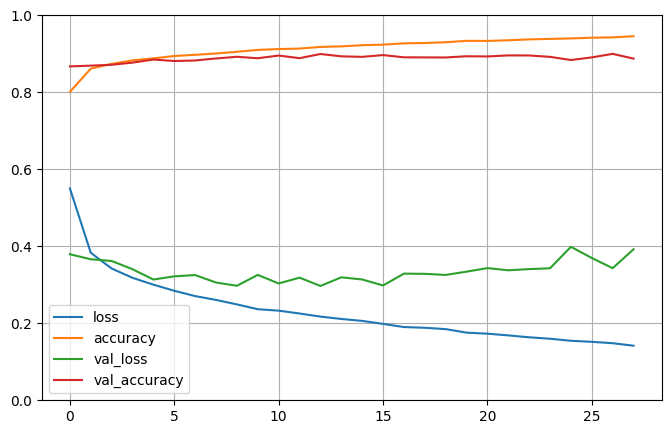

In [26]:
show_history_plot(history10_rn28)

In [27]:
model10_rn28.evaluate(test_images, sc_test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.4288 - accuracy: 0.8819


[0.4287644624710083, 0.8819000124931335]

#### 10.3. Inicialización con GlorotUniform

In [110]:
# Definimos la arquitectura de la red neuronal
model10_gu = Sequential()
model10_gu.add(Flatten(input_shape=(28, 28)))
model10_gu.add(Dense(128, activation='relu', kernel_initializer=GlorotUniform(), bias_initializer=Zeros()))
model10_gu.add(Dense(128, activation='relu', kernel_initializer=GlorotUniform(), bias_initializer=Zeros()))
model10_gu.add(Dense(128, activation='relu', kernel_initializer=GlorotUniform(), bias_initializer=Zeros()))
model10_gu.add(Dense(128, activation='relu', kernel_initializer=GlorotUniform(), bias_initializer=Zeros()))
model10_gu.add(Dense(10, activation='softmax'))

# Compilamos el modelo
model10_gu.compile(
    optimizer="adam",
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

# Entrenamos el modelo
history10_gu = model10_gu.fit(
    X_train, y_train, 
    epochs=epochs_10, batch_size=batch_size_10,
#    callbacks=[CallbackAccuracy95()],
    validation_data=(X_valid, y_valid)
)

Epoch 1/50
860/860 [==============================] - 6s 5ms/step - loss: 0.5204 - accuracy: 0.8120 - val_loss: 0.3773 - val_accuracy: 0.8660
Epoch 2/50
860/860 [==============================] - 5s 5ms/step - loss: 0.3775 - accuracy: 0.8617 - val_loss: 0.3441 - val_accuracy: 0.8770
Epoch 3/50
860/860 [==============================] - 5s 6ms/step - loss: 0.3411 - accuracy: 0.8737 - val_loss: 0.3444 - val_accuracy: 0.8728
Epoch 4/50
860/860 [==============================] - 5s 5ms/step - loss: 0.3150 - accuracy: 0.8827 - val_loss: 0.3167 - val_accuracy: 0.8844
Epoch 5/50
860/860 [==============================] - 5s 5ms/step - loss: 0.2959 - accuracy: 0.8899 - val_loss: 0.3244 - val_accuracy: 0.8884
Epoch 6/50
860/860 [==============================] - 5s 5ms/step - loss: 0.2854 - accuracy: 0.8917 - val_loss: 0.3236 - val_accuracy: 0.8806
Epoch 7/50
860/860 [==============================] - 4s 5ms/step - loss: 0.2704 - accuracy: 0.8994 - val_loss: 0.3026 - val_accuracy: 0.8918
Epoch 

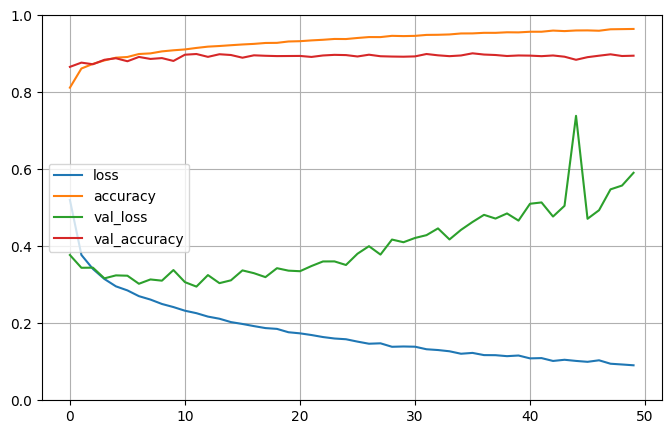

In [111]:
show_history_plot(history10_gu)

In [112]:
model10_gu.evaluate(test_images, sc_test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.6495 - accuracy: 0.8859


[0.6494605541229248, 0.8859000205993652]

> También creo que podríamos dejarlo en 28 epochs

##### 10.3.1. Con 28 epochs

In [32]:
# Definimos la arquitectura de la red neuronal
model10_gu28 = Sequential()
model10_gu28.add(Flatten(input_shape=(28, 28)))
model10_gu28.add(Dense(128, activation='relu', kernel_initializer=GlorotUniform(), bias_initializer=Zeros()))
model10_gu28.add(Dense(128, activation='relu', kernel_initializer=GlorotUniform(), bias_initializer=Zeros()))
model10_gu28.add(Dense(128, activation='relu', kernel_initializer=GlorotUniform(), bias_initializer=Zeros()))
model10_gu28.add(Dense(128, activation='relu', kernel_initializer=GlorotUniform(), bias_initializer=Zeros()))
model10_gu28.add(Dense(10, activation='softmax'))

# Compilamos el modelo
model10_gu28.compile(
    optimizer="adam",
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

# Entrenamos el modelo
history10_gu28 = model10_gu28.fit(
    X_train, y_train, 
    epochs=28, batch_size=batch_size_10,
    validation_data=(X_valid, y_valid)
)

Epoch 1/28
860/860 [==============================] - 6s 5ms/step - loss: 0.5206 - accuracy: 0.8140 - val_loss: 0.4644 - val_accuracy: 0.8238
Epoch 2/28
860/860 [==============================] - 5s 6ms/step - loss: 0.3723 - accuracy: 0.8611 - val_loss: 0.3398 - val_accuracy: 0.8768
Epoch 3/28
860/860 [==============================] - 5s 5ms/step - loss: 0.3377 - accuracy: 0.8745 - val_loss: 0.3527 - val_accuracy: 0.8758
Epoch 4/28
860/860 [==============================] - 5s 5ms/step - loss: 0.3148 - accuracy: 0.8826 - val_loss: 0.3286 - val_accuracy: 0.8786
Epoch 5/28
860/860 [==============================] - 5s 5ms/step - loss: 0.2985 - accuracy: 0.8881 - val_loss: 0.3070 - val_accuracy: 0.8920
Epoch 6/28
860/860 [==============================] - 5s 5ms/step - loss: 0.2837 - accuracy: 0.8931 - val_loss: 0.3137 - val_accuracy: 0.8870
Epoch 7/28
860/860 [==============================] - 5s 5ms/step - loss: 0.2749 - accuracy: 0.8980 - val_loss: 0.3073 - val_accuracy: 0.8882
Epoch 

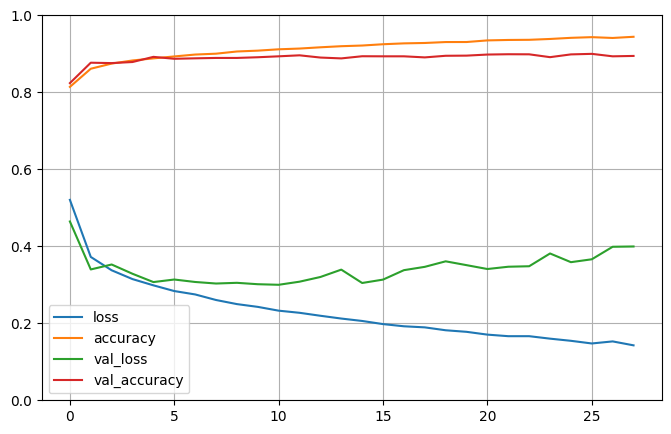

In [33]:
show_history_plot(history10_gu28)

In [34]:
model10_gu28.evaluate(test_images, sc_test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.4233 - accuracy: 0.8839


[0.4233247935771942, 0.883899986743927]

#### 10.4. Conclusiones

Como se puede apreciar, la inicialización de los pesos o __weights__ con `zeros` no ha surtido efecto. Normalmente, se inicializa con esta estrategia el __bias__. La razón es que todas las neuronas tienen la salida a 0 y por la naturaleza del backpropagation no hay simetría, aspecto opuesto a lo que necesitamos.

En los otros dos casos (RandomNormal y Glorot, que esta última es la técnica denominada Xavier), hemos reducido muy poco la pérdida y hemos conseguido un 88% (pasado) de accuracy. Con menos epochs (en vez de hacer early stops) conseguimos reducir la pérdida y dejar de entrenar con una accuracy bastante elevada en ambos casos (cerca del 95%).

## 11. Optimizadores

**Ejercicio 11 *(0.75 puntos)***: Partiendo de una red similar a la del ejercicio anterior (utilizando la mejor estrategia de inicialización observada), comparar y analizar las diferencias que se observan  al entrenar con varios de los optimizadores vistos en clase, incluyendo SGD como optimizador básico (se puede explorar el espacio de hiperparámetros de cada optimizador, aunque para optimizadores más avanzados del estilo de adam y RMSprop es buena idea dejar los valores por defecto provistos por Keras).

In [ ]:
## Tu código y comentarios de texto aquí
## Puedes incluir tantas celdas como quieras
## No olvides utilizar celdas de Markdown para texto

In [42]:
epochs_11 = 45
batch_size_11 = 64

#### 11.1. Optimizador SGD

In [48]:
# Definimos la arquitectura de la red neuronal
model11_sgd = Sequential()
model11_sgd.add(Flatten(input_shape=(28, 28)))
model11_sgd.add(Dense(128, activation='relu', bias_initializer=Zeros(), kernel_initializer=RandomNormal()))
model11_sgd.add(Dense(128, activation='relu', bias_initializer=Zeros(), kernel_initializer=RandomNormal()))
model11_sgd.add(Dense(128, activation='relu', bias_initializer=Zeros(), kernel_initializer=RandomNormal()))
model11_sgd.add(Dense(128, activation='relu', bias_initializer=Zeros(), kernel_initializer=RandomNormal()))
model11_sgd.add(Dense(10, activation='softmax'))

#Creamos el optimizador
sgd = SGD(learning_rate=0.01, momentum=0.9, decay=1e-6, nesterov=True)

# Compilamos el modelo
model11_sgd.compile(
    optimizer=sgd,
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

# Entrenamos el modelo
history11_sgd = model11_sgd.fit(
    X_train, y_train, 
    epochs=epochs_11, batch_size=batch_size_11,
    validation_data=(X_valid, y_valid)
)

/home/joninazio/.virtualenvs/mia-sca-act1/lib/python3.10/site-packages/keras/src/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
860/860 [==============================] - 6s 6ms/step - loss: 0.7201 - accuracy: 0.7503 - val_loss: 0.4440 - val_accuracy: 0.8438
Epoch 2/45
860/860 [==============================] - 4s 5ms/step - loss: 0.4184 - accuracy: 0.8481 - val_loss: 0.3901 - val_accuracy: 0.8604
Epoch 3/45
860/860 [==============================] - 4s 5ms/step - loss: 0.3717 - accuracy: 0.8657 - val_loss: 0.3382 - val_accuracy: 0.8748
Epoch 4/45
860/860 [==============================] - 4s 5ms/step - loss: 0.3414 - accuracy: 0.8748 - val_loss: 0.3652 - val_accuracy: 0.8718
Epoch 5/45
860/860 [==============================] - 4s 5ms/step - loss: 0.3229 - accuracy: 0.8809 - val_loss: 0.3492 - val_accuracy: 0.8716
Epoch 6/45
860/860 [==============================] - 4s 4ms/step - loss: 0.3059 - accuracy: 0.8865 - val_loss: 0.3123 - val_accuracy: 0.8864
Epoch 7/45
860/860 [==============================] - 4s 5ms/step - loss: 0.2914 - accuracy: 0.8919 - val_loss: 0.3230 - val_accuracy: 0.8828
Epoch 

In [49]:
model11_sgd.evaluate(test_images, sc_test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.4503 - accuracy: 0.8865


[0.4502580165863037, 0.8865000009536743]

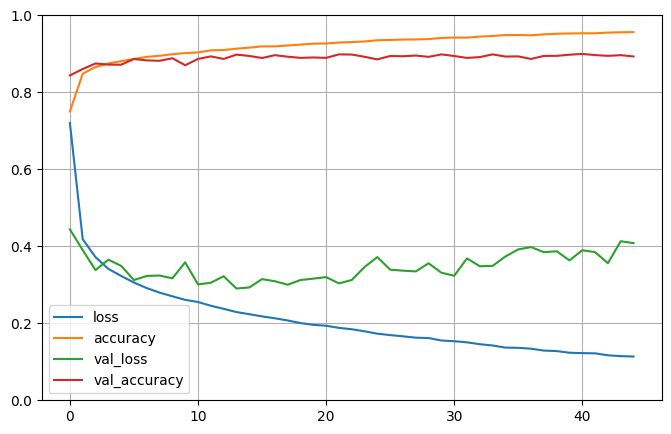

In [50]:
show_history_plot(history11_sgd)

> Voy a modificar un poco los hiperparámetros, acelerar el learning_rate.

In [60]:
# Definimos la arquitectura de la red neuronal
model11_sgd2 = Sequential()
model11_sgd2.add(Flatten(input_shape=(28, 28)))
model11_sgd2.add(Dense(128, activation='relu', bias_initializer=Zeros(), kernel_initializer=RandomNormal()))
model11_sgd2.add(Dense(128, activation='relu', bias_initializer=Zeros(), kernel_initializer=RandomNormal()))
model11_sgd2.add(Dense(128, activation='relu', bias_initializer=Zeros(), kernel_initializer=RandomNormal()))
model11_sgd2.add(Dense(128, activation='relu', bias_initializer=Zeros(), kernel_initializer=RandomNormal()))
model11_sgd2.add(Dense(10, activation='softmax'))

#Creamos el optimizador
sgd2 = SGD(learning_rate=0.05, momentum=0.9, decay=1e-6, nesterov=True)

# Compilamos el modelo
model11_sgd2.compile(
    optimizer=sgd2,
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

# Entrenamos el modelo
history11_sgd2 = model11_sgd2.fit(
    X_train, y_train, 
    epochs=epochs_11, batch_size=batch_size_11,
    validation_data=(X_valid, y_valid)
)

Epoch 1/45
860/860 [==============================] - 4s 5ms/step - loss: 0.5854 - accuracy: 0.7833 - val_loss: 0.4552 - val_accuracy: 0.8394
Epoch 2/45
860/860 [==============================] - 4s 4ms/step - loss: 0.4031 - accuracy: 0.8514 - val_loss: 0.4152 - val_accuracy: 0.8510
Epoch 3/45
860/860 [==============================] - 4s 4ms/step - loss: 0.3637 - accuracy: 0.8662 - val_loss: 0.3529 - val_accuracy: 0.8736
Epoch 4/45
860/860 [==============================] - 4s 4ms/step - loss: 0.3400 - accuracy: 0.8769 - val_loss: 0.3450 - val_accuracy: 0.8692
Epoch 5/45
860/860 [==============================] - 4s 4ms/step - loss: 0.3222 - accuracy: 0.8807 - val_loss: 0.3353 - val_accuracy: 0.8784
Epoch 6/45
860/860 [==============================] - 4s 4ms/step - loss: 0.3050 - accuracy: 0.8890 - val_loss: 0.3243 - val_accuracy: 0.8806
Epoch 7/45
860/860 [==============================] - 4s 5ms/step - loss: 0.2933 - accuracy: 0.8914 - val_loss: 0.3442 - val_accuracy: 0.8738
Epoch 

In [61]:
model11_sgd2.evaluate(test_images, sc_test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.4427 - accuracy: 0.8899


[0.4426584541797638, 0.8899000287055969]

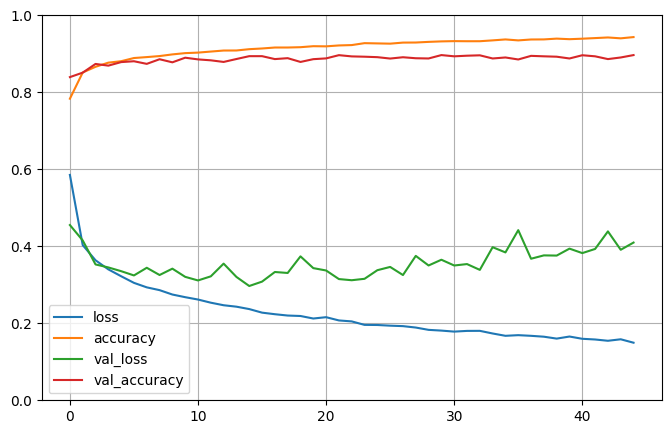

In [62]:
show_history_plot(history11_sgd2)

In [92]:
# Definimos la arquitectura de la red neuronal
model11_sgd3 = Sequential()
model11_sgd3.add(Flatten(input_shape=(28, 28)))
model11_sgd3.add(Dense(128, activation='relu', bias_initializer=Zeros(), kernel_initializer=RandomNormal()))
model11_sgd3.add(Dense(128, activation='relu', bias_initializer=Zeros(), kernel_initializer=RandomNormal()))
model11_sgd3.add(Dense(128, activation='relu', bias_initializer=Zeros(), kernel_initializer=RandomNormal()))
model11_sgd3.add(Dense(128, activation='relu', bias_initializer=Zeros(), kernel_initializer=RandomNormal()))
model11_sgd3.add(Dense(10, activation='softmax'))

#Creamos el optimizador
sgd3 = SGD(learning_rate=0.04, momentum=0.9, decay=1e-6, nesterov=True)

# Compilamos el modelo
model11_sgd3.compile(
    optimizer=sgd3,
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

# Entrenamos el modelo
history11_sgd3 = model11_sgd3.fit(
    X_train, y_train, 
    epochs=25, batch_size=batch_size_11,
    validation_data=(X_valid, y_valid)
)

Epoch 1/25
860/860 [==============================] - 4s 5ms/step - loss: 0.5686 - accuracy: 0.7929 - val_loss: 0.4650 - val_accuracy: 0.8330
Epoch 2/25
860/860 [==============================] - 4s 5ms/step - loss: 0.3935 - accuracy: 0.8550 - val_loss: 0.4327 - val_accuracy: 0.8510
Epoch 3/25
860/860 [==============================] - 4s 5ms/step - loss: 0.3563 - accuracy: 0.8691 - val_loss: 0.4018 - val_accuracy: 0.8538
Epoch 4/25
860/860 [==============================] - 4s 5ms/step - loss: 0.3352 - accuracy: 0.8767 - val_loss: 0.3551 - val_accuracy: 0.8776
Epoch 5/25
860/860 [==============================] - 4s 5ms/step - loss: 0.3182 - accuracy: 0.8828 - val_loss: 0.3509 - val_accuracy: 0.8752
Epoch 6/25
860/860 [==============================] - 4s 4ms/step - loss: 0.3032 - accuracy: 0.8874 - val_loss: 0.3612 - val_accuracy: 0.8750
Epoch 7/25
860/860 [==============================] - 4s 5ms/step - loss: 0.2895 - accuracy: 0.8930 - val_loss: 0.3351 - val_accuracy: 0.8780
Epoch 

In [93]:
model11_sgd3.evaluate(test_images, sc_test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.3481 - accuracy: 0.8838


[0.3481336534023285, 0.8838000297546387]

#### 11.2. Optimizador Adagrad

In [90]:
# Definimos la arquitectura de la red neuronal
model11_adagrad = Sequential()
model11_adagrad.add(Flatten(input_shape=(28, 28)))
model11_adagrad.add(Dense(128, activation='relu', bias_initializer=Zeros(), kernel_initializer=RandomNormal()))
model11_adagrad.add(Dense(128, activation='relu', bias_initializer=Zeros(), kernel_initializer=RandomNormal()))
model11_adagrad.add(Dense(128, activation='relu', bias_initializer=Zeros(), kernel_initializer=RandomNormal()))
model11_adagrad.add(Dense(128, activation='relu', bias_initializer=Zeros(), kernel_initializer=RandomNormal()))
model11_adagrad.add(Dense(10, activation='softmax'))

# Optimizador Adagrad
adagrad = Adagrad(learning_rate=0.05)

# Compilamos el modelo
model11_adagrad.compile(
    optimizer=adagrad,
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

# Entrenamos el modelo
history11_adagrad = model11_adagrad.fit(
    X_train, y_train, 
    epochs=25, batch_size=batch_size_11,
    validation_data=(X_valid, y_valid)
)

Epoch 1/25
860/860 [==============================] - 4s 5ms/step - loss: 0.6934 - accuracy: 0.7402 - val_loss: 0.6218 - val_accuracy: 0.7674
Epoch 2/25
860/860 [==============================] - 4s 4ms/step - loss: 0.4198 - accuracy: 0.8444 - val_loss: 0.4276 - val_accuracy: 0.8478
Epoch 3/25
860/860 [==============================] - 4s 4ms/step - loss: 0.3685 - accuracy: 0.8636 - val_loss: 0.3452 - val_accuracy: 0.8724
Epoch 4/25
860/860 [==============================] - 4s 4ms/step - loss: 0.3390 - accuracy: 0.8745 - val_loss: 0.4417 - val_accuracy: 0.8368
Epoch 5/25
860/860 [==============================] - 4s 5ms/step - loss: 0.3167 - accuracy: 0.8830 - val_loss: 0.3422 - val_accuracy: 0.8730
Epoch 6/25
860/860 [==============================] - 5s 6ms/step - loss: 0.2992 - accuracy: 0.8885 - val_loss: 0.4349 - val_accuracy: 0.8476
Epoch 7/25
860/860 [==============================] - 4s 5ms/step - loss: 0.2865 - accuracy: 0.8939 - val_loss: 0.3357 - val_accuracy: 0.8830
Epoch 

In [91]:
model11_adagrad.evaluate(test_images, sc_test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.3837 - accuracy: 0.8801


[0.3837268352508545, 0.8801000118255615]

##### 11.3. Conclusiones

En cuanto al optimizador SGD, los mejores resultados los hemos obtenido con un `learning_rate=0.03` y un `momentum=0.9` (un accuracy de 89% y loss de 43%). He probado a subir el momentum a 0.99 y me ha dado unos resultados un tanto extraños. El learning rate, sin embargo, el mejor resultado lo he conseguido en 0.03: con valores mayores y menores conseguía una accuracy menor y un mayor loss.

Por otro lado, en cuanto a Adagrad, hemos conseguido una accuracy de 89-88% y un loss de ~35% con un `learning_rate=0.05`. 

Como hemos conseguido resultados parecidos, voy a elegir `Adagrad` para el punto final.

## 12. Regularización y red final *(1.25 puntos)*

**Ejercicio 12 *(1 punto)***: Entrenar una red final que sea capaz de obtener una accuracy en el validation set cercana al 90%. Para ello, combinar todo lo aprendido anteriormente y utilizar técnicas de regularización para evitar overfitting. Algunos de los elementos que pueden tenerse en cuenta son los siguientes.

* Número de capas y neuronas por capa
* Optimizadores y sus parámetros
* Batch size
* Unidades de activación
* Uso de capas dropout, regularización L2, regularización L1...
* Early stopping (se puede aplicar como un callback de Keras, o se puede ver un poco "a ojo" cuándo el modelo empieza a caer en overfitting y seleccionar el número de epochs necesarias)
* Batch normalization

Si los modelos entrenados anteriormente ya se acercaban al valor requerido de accuracy, probar distintas estrategias igualmente y comentar los resultados.

Explicar brevemente la estrategia seguida y los modelos probados para obtener el modelo final, que debe verse entrenado en este Notebook. No es necesario guardar el entrenamiento de todos los modelos que se han probado, es suficiente con explicar cómo se ha llegado al modelo final.

In [124]:
## Tu modelo y comentarios de texto aquí
## Puedes incluir tantas celdas como quieras
## No olvides utilizar celdas de Markdown para texto

epochs_12 = 50
batch_size_12 = 64

In [125]:
class CallbackAccuracy92(tf.keras.callbacks.Callback):
      def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') > 0.92:
              print(f"\nAlcanzado el 92% de precisión ({logs.get('accuracy')}) en la epoch {epoch}, se cancela el entrenamiento!!")
              self.model.stop_training = True

In [132]:
# Definimos la arquitectura de la red neuronal
model12 = Sequential()
model12.add(Flatten(input_shape=(28, 28)))
model12.add(Dense(128, activation='relu', bias_initializer=Zeros(), kernel_initializer=RandomNormal()))
model12.add(Dense(128, activation='relu', bias_initializer=Zeros(), kernel_initializer=RandomNormal()))
model12.add(Dense(128, activation='relu', bias_initializer=Zeros(), kernel_initializer=RandomNormal()))
model12.add(Dense(128, activation='relu', bias_initializer=Zeros(), kernel_initializer=RandomNormal()))
model12.add(Dense(10, activation='softmax'))

# Compilamos el modelo
model12.compile(
    optimizer=Adagrad(learning_rate=0.05),
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

# Entrenamos el modelo
model12_history = model12.fit(
    X_train, y_train, 
    epochs=epochs_12, batch_size=batch_size_12,
    validation_data=(X_valid, y_valid),
    callbacks=[CallbackAccuracy92()]
)

Epoch 1/50
860/860 [==============================] - 4s 5ms/step - loss: 0.7091 - accuracy: 0.7353 - val_loss: 0.4658 - val_accuracy: 0.8250
Epoch 2/50
860/860 [==============================] - 4s 5ms/step - loss: 0.4241 - accuracy: 0.8436 - val_loss: 0.4884 - val_accuracy: 0.8180
Epoch 3/50
860/860 [==============================] - 4s 5ms/step - loss: 0.3713 - accuracy: 0.8632 - val_loss: 0.3668 - val_accuracy: 0.8638
Epoch 4/50
860/860 [==============================] - 4s 5ms/step - loss: 0.3402 - accuracy: 0.8745 - val_loss: 0.3705 - val_accuracy: 0.8642
Epoch 5/50
860/860 [==============================] - 4s 5ms/step - loss: 0.3194 - accuracy: 0.8819 - val_loss: 0.3366 - val_accuracy: 0.8746
Epoch 6/50
860/860 [==============================] - 4s 5ms/step - loss: 0.3038 - accuracy: 0.8867 - val_loss: 0.4206 - val_accuracy: 0.8516
Epoch 7/50
860/860 [==============================] - 4s 5ms/step - loss: 0.2878 - accuracy: 0.8927 - val_loss: 0.3417 - val_accuracy: 0.8762
Epoch 

In [133]:
model12.evaluate(test_images, sc_test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.4053 - accuracy: 0.8683


[0.40525373816490173, 0.8683000206947327]

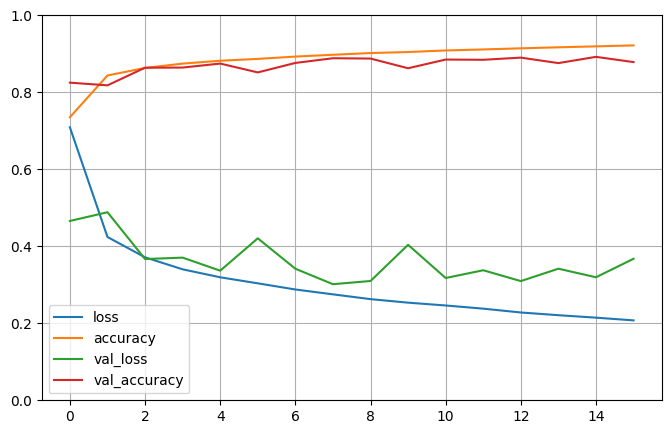

In [134]:
show_history_plot(model12_history)

#### Dropout y regularización L1 y L2

In [135]:
# Definimos la arquitectura de la red neuronal
model12_2 = Sequential()
model12_2.add(Flatten(input_shape=(28, 28)))
model12_2.add(Dense(128, activation='relu', bias_initializer=Zeros(), kernel_initializer=RandomNormal(), kernel_regularizer=L1L2()))
model12_2.add(BatchNormalizationV2())
model12_2.add(Dropout(rate=0.3))
model12_2.add(Dense(128, activation='relu', bias_initializer=Zeros(), kernel_initializer=RandomNormal(), kernel_regularizer=L1L2()))
model12_2.add(BatchNormalizationV2())
model12_2.add(Dropout(0.3))
model12_2.add(Dense(128, activation='relu', bias_initializer=Zeros(), kernel_initializer=RandomNormal(), kernel_regularizer=L1L2()))
model12_2.add(BatchNormalizationV2())
model12_2.add(Dropout(0.3))
model12_2.add(Dense(128, activation='relu', bias_initializer=Zeros(), kernel_initializer=RandomNormal(), kernel_regularizer=L1L2()))
model12_2.add(BatchNormalizationV2())
model12_2.add(Dropout(0.3))
model12_2.add(Dense(10, activation='softmax'))

# Compilamos el modelo
model12_2.compile(
    optimizer=Adagrad(learning_rate=0.05),
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

# Entrenamos el modelo
model12_2_history = model12_2.fit(
    X_train, y_train, 
    epochs=epochs_12, batch_size=batch_size_12,
    validation_data=(X_valid, y_valid),
    callbacks=[CallbackAccuracy92()]
)

Epoch 1/50
860/860 [==============================] - 8s 8ms/step - loss: 0.6516 - accuracy: 0.7715 - val_loss: 0.4885 - val_accuracy: 0.8220
Epoch 2/50
860/860 [==============================] - 7s 8ms/step - loss: 0.5163 - accuracy: 0.8181 - val_loss: 0.4302 - val_accuracy: 0.8392
Epoch 3/50
860/860 [==============================] - 7s 8ms/step - loss: 0.4771 - accuracy: 0.8307 - val_loss: 0.3907 - val_accuracy: 0.8516
Epoch 4/50
860/860 [==============================] - 7s 8ms/step - loss: 0.4516 - accuracy: 0.8411 - val_loss: 0.3746 - val_accuracy: 0.8630
Epoch 5/50
860/860 [==============================] - 7s 8ms/step - loss: 0.4367 - accuracy: 0.8455 - val_loss: 0.4127 - val_accuracy: 0.8516
Epoch 6/50
860/860 [==============================] - 7s 8ms/step - loss: 0.4234 - accuracy: 0.8485 - val_loss: 0.3447 - val_accuracy: 0.8746
Epoch 7/50
860/860 [==============================] - 7s 8ms/step - loss: 0.4116 - accuracy: 0.8530 - val_loss: 0.3480 - val_accuracy: 0.8704
Epoch 

In [136]:
model12_2.evaluate(test_images, sc_test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.3377 - accuracy: 0.8829


[0.33769530057907104, 0.8828999996185303]

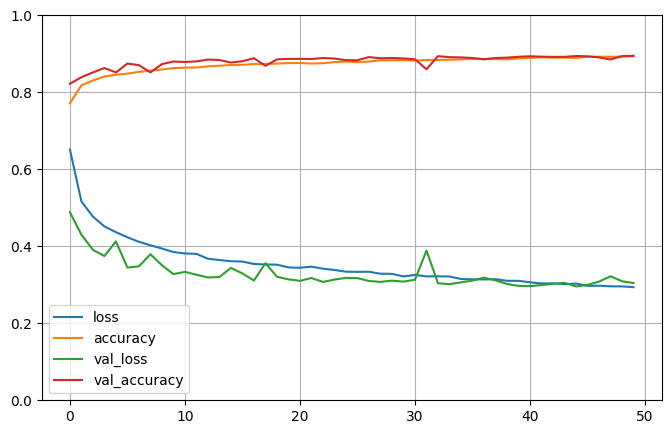

In [137]:
show_history_plot(model12_2_history)

##### 12.1. Conclusiones

Este punto final lo he podido desarrollar con todo el conocimiento adquirido a través del resto de los 11 puntos, en los que he podido entrenar modelos con distintas arquitecturas, capas y configuraciones. Si algo he podido aprender desde un inicio es que más no siempre tiene que ser mejor: no por tener más neuronas vas a obtener mejores resultados. Hay que saber elegir bien las distintas capas y sus configuraciones.

Primero, destacar que la forma en la que se crea una arquitectura es bastante __straightforward__, sobre todo si tienes soltura y experiencia en bucear por los APIs, documentación y experiencia de la gente en las distintas plataformas de resolución de dudas y problemas. Segundo, tal y como he comentado, la actividad es bastante didáctica. Personalmente, creo que la forma en la que se enseña a usar Tensorflow y Keras realmente enseña, tal y como sucede en las clases teóricas. 

Partiendo de esa base, para este punto he partido de las arquitecturas probadas anteriormente, aunque destacaría el punto inicial: capa flatten, 4 capas densas con activador relu de 128 neuronas y una capa densa softmax. He venido entrenando con el optimizador adam, aunque en el último punto me he decantado por el optimizador Adagrad ajustando el learning_rate a un ratio con el cual el modelo ha podido ir aprendiendo controlando el overfitting y manteniendo una precisión bastante aceptable. 

Si bien las técnicas de early stop no son necesarias si tienes tiempo suficiente para detectar __a ojo__ las épocas, soy de los que piensan que toda automatización es imprescindible para despreocuparse a la hora del desarrollo, en este caso el entrenamiento de la red neuronal. Por ello, aunque ha habido puntos en las que no lo he usado, en este punto final lo he considerado más que oportuno. 

La inicialización de parámetros también ha sido interesante y he podido aprender técnicas para no comenzar a entrenar una red neuronal desde "cualquier punto". En este caso, me he quedado con la inicialización de RandomUniform porque ha sido la que mejores resultados me ha parecido que ha dado.

Además, hay algunos aspectos que casi no se han tratado en esta actividad, como las capas dropout y batch normalization. He intentado adaptarlas lo mejor posible para conseguir unos resultados que a mi juicio sean aceptables. En cuanto a la normalización, la he aplicado en este mismo punto.

Por último, comentar que todo este trabajo es una aproximación de lo que puede considerarse que es entrenar una red neuronal real. Entiendo que saber elegir una arquitectura adecuada para un determinado dataset te lo da una experiencia en este tipo de actividades, por lo que seguramente en este trabajo habrá cantidad de aspectos mejorables (que en un futuro espero poder recordar y ser capaz de mejorarlos).

Como resultados, creo que he conseguido unos números aceptables. Si bien a la hora de entrenamiento he conseguido superar una precisión del 90% en muchos casos, a la hora de la validación del modelo se ha quedado cerca en muchos casos (88% - 89% en el mejor de los casos). Destacar que, a no ser que controles las seeds de muchos de los algoritmos o técnicas, conseguir los mismos resultados en distintas ejecuciones es complicado, puesto que en juego la aleatoriedad.   

